### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


### Goal for this Notebook:
Make a simple analysis of the Titanic disaster in Python using a full complement of PyData utilities.

#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [Matplotlib](http://matplotlib.org/)

***The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score



### Data Handling
#### Read data (training set) in using pandas:

In [164]:
df = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

Show an overview of our data: 

In [165]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Learn more about the data:

Above is a summary of data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here.

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

### Take care of missing values:
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset. Drop waste features.

Also remove NaN values from each remaining column / feature.

Now we have a clean and tidy dataset that is ready for analysis. 



In [166]:
# Remove ticket and cabin features
df = df.drop(['Ticket', 'Cabin'], axis=1)
df.dropna(inplace=True)
#df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
#df_test.dropna(inplace=True)

# Remove NaN values


In [167]:
# Don't touch this cell
assert "ticket" not in df.columns
assert "cabin" not in df.columns
assert df.isna().sum().sum() == 0

For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

### Let's take a Look at our data graphically:

Plot 5 graphs in this section:


1.   Plots a bar graph of those who survived vs those who did not. 
2.   Plots a Scatterplot of Survived distribution by Age
3.   Plots a bar graph of Class distribution
4.   Plots kernel density estimate of the passengers's age separately for all 3 classes
5.   Plots a bar graph of passengers per boarding location



In [168]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
plt.title("Distribution of Survival, (1 = Survived)") 
# plots a bar graph of those who surived vs those who did not.  
ax1.bar(['Not survived', 'Survived'],df.Survived.value_counts())


plt.subplot2grid((2,3),(0,1))
plt.title("Survival by Age,  (1 = Survived)")
x = pd.unique(df.Age)
y = [100 * len(df[(df.Age == age) & (df.Survived == 1)]) / (df.Age == age).sum() for age in x]        #survivers_percentage
plt.scatter(x, y)

ax3 = plt.subplot2grid((2,3),(0,2))
plt.title("Class Distribution")
ax3.bar(['3', '2', '1'], df.Pclass.value_counts()) 


# plots a kernel density estimate of the passengers's age separately for all 3 classes
plt.subplot2grid((2,3),(1,0), colspan=2)
plt.title("Age Distribution within classes")
#df.Age[df.Pclass == 1].plot(kind='kde')    
#df.Age[df.Pclass == 2].plot(kind='kde')
#df.Age[df.Pclass == 3].plot(kind='kde')
sns.kdeplot(data = df, hue=df.Pclass, x=df.Age, common_norm=False, palette='Set2')


ax5 = plt.subplot2grid((2,3),(1,2))
plt.title("Passengers per boarding location")
ax5.bar(list(df.Embarked.unique()), df.Embarked.value_counts()) 


<BarContainer object of 3 artists>

### Exploratory Visualization:

The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price

Let’s see if we can gain a better understanding of who survived and died. 


First plot a bar graph of those who Survived Vs. Those who did not.


<BarContainer object of 2 artists>

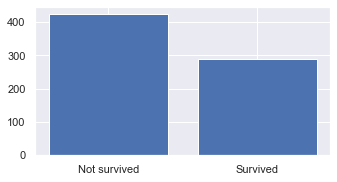

In [169]:
fig = plt.figure(figsize=(18,6)) 
ax1 = plt.subplot2grid((2,3),(0,0))
ax1.bar(['Not survived', 'Survived'],df.Survived.value_counts())

### Next tease more structure out of the data,
### Break the previous graph down by gender


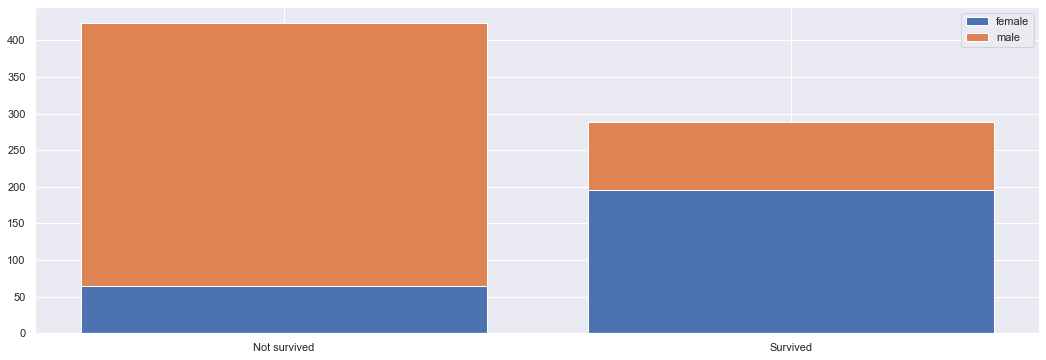

In [170]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female, of the survived variable.
# After that call value_counts() so it can be easily plotted as a bar graph. 
# you can use kind='barh' argument. It is just a horizontal bar graph

# Next adjust graph to display the proportions of survival by gender

#df.Sex.value_counts()

#print([(df.Sex == 'female') & (df.Survived == '1' )]) not work

l = [[len(df[(df.Sex == gender) & (df.Survived == survival )]) #l[0] male and female not survived 
                   for survival in pd.unique(df.Survived)]     #l[1] male and female survived
                   for gender in pd.unique(df.Sex)]

plt.bar(['Not survived', 'Survived'],  l[1])
plt.bar(['Not survived', 'Survived'],  l[0], bottom = l[1])

plt.legend(['female','male'],loc="upper right")
plt.show()



Add your summaryabout recieved data for raw value counts and proportionally

𝐀𝐬 𝐰𝐞 𝐜𝐚𝐧 𝐬𝐞𝐞 𝐦𝐞𝐧 𝐡𝐚𝐯𝐞 𝐡𝐢𝐠𝐡𝐞𝐫 𝐩𝐫𝐨𝐛𝐚𝐛𝐢𝐥𝐢𝐭𝐲 𝐨𝐟 𝐝𝐞𝐚𝐭𝐡 𝐨𝐧 𝐓𝐢𝐭𝐚𝐧𝐢𝐜 𝐭𝐡𝐚𝐧 𝐰𝐨𝐦𝐞𝐧. 𝐌𝐨𝐬𝐭 𝐨𝐟 𝐭𝐡𝐞 𝐬𝐮𝐫𝐯𝐢𝐯𝐨𝐫𝐬 𝐚𝐫𝐞 𝐰𝐨𝐦𝐞𝐧, 𝐝𝐞𝐬𝐩𝐢𝐭𝐞 𝐭𝐡𝐞 𝐟𝐚𝐜𝐭 𝐭𝐡𝐚𝐭 𝐭𝐡𝐞 𝐭𝐨𝐭𝐚𝐥 𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐰𝐨𝐦𝐞𝐧 𝐨𝐧 𝐭𝐡𝐞 𝐬𝐡𝐢𝐩 𝐢𝐬 𝐥𝐞𝐬𝐬 𝐭𝐡𝐚𝐧 𝐦𝐞𝐧.

#### Try to go down even further:
Can we capture more of the structure by using Pclass? Here try to bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Break it down by Gender and what Class they were traveling in.


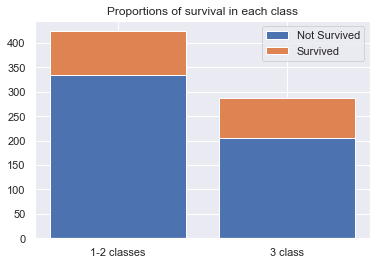

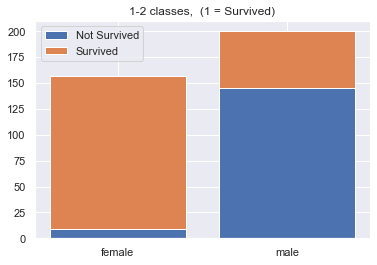

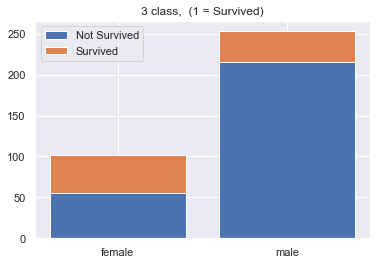

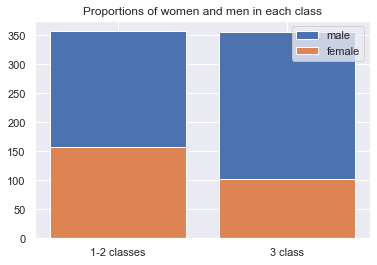

In [171]:
l = [[len(df[(df.Pclass == cl) & (df.Survived == survival )]) #l[0] male and female not survived 
                   for survival in pd.unique(df.Survived)]     #l[1] male and female survived
                   for cl in pd.unique(df.Pclass)]
l1=[]
l1.append(l[0][0]+l[1][0])
l1.append(l[0][1]+l[1][1])
plt.bar(['1-2 classes', '3 class'], l1)
plt.bar(['1-2 classes', '3 class'], l[2], bottom = l1)
plt.title("Proportions of survival in each class")
plt.legend(['Not Survived', 'Survived'])
plt.show()

plt.title("1-2 classes,  (1 = Survived)")
not_surv=[]
surv=[]
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()  
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
not_surv.extend((female_highclass[0],male_highclass[0]))
surv.extend((female_highclass[1],male_highclass[1]))
plt.bar(['female', 'male'], not_surv)
plt.bar(['female', 'male'], surv, bottom = not_surv)
plt.legend(['Not Survived', 'Survived'])
plt.show()

plt.title("3 class,  (1 = Survived)")
not_surv3=[]
surv3=[]
male_highclass3 = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts() 
female_highclass3 = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
not_surv3.extend((female_highclass3[0],male_highclass3[0]))
surv3.extend((female_highclass3[1],male_highclass3[1]))
plt.bar(['female', 'male'], not_surv3)
plt.bar(['female', 'male'], surv3, bottom = not_surv3)
plt.legend(['Not Survived', 'Survived'])
plt.show()

plt.title("Proportions of women and men in each class")
female=[sum(female_highclass),sum(female_highclass3)]
male=[sum(male_highclass),sum(male_highclass3)]
plt.bar(["1-2 classes","3 class"], male, bottom=female)
plt.bar(["1-2 classes","3 class"], female)
plt.legend(['male','female'])


Try to get a conclusions of the recieved data

𝐈𝐭’𝐬 𝐜𝐥𝐞𝐚𝐫, 𝐭𝐡𝐚𝐭 𝐚𝐥𝐭𝐡𝐨𝐮𝐠𝐡 𝐦𝐨𝐫𝐞 𝐦𝐞𝐧 𝐝𝐢𝐞𝐝 𝐚𝐧𝐝 𝐬𝐮𝐫𝐯𝐢𝐯𝐞𝐝 𝐢𝐧 𝐫𝐚𝐰 𝐯𝐚𝐥𝐮𝐞 𝐜𝐨𝐮𝐧𝐭𝐬, 𝐟𝐞𝐦𝐚𝐥𝐞𝐬 𝐡𝐚𝐝 𝐚 𝐠𝐫𝐞𝐚𝐭𝐞𝐫 𝐬𝐮𝐫𝐯𝐢𝐯𝐚𝐥 𝐫𝐚𝐭𝐞, 𝐰𝐡𝐚𝐭 𝐰𝐞 𝐨𝐛𝐬𝐞𝐫𝐯𝐞 𝐨𝐧 𝐭𝐡𝐞 𝐠𝐫𝐚𝐩𝐡𝐬 𝐛𝐚𝐬𝐞𝐝 𝐨𝐧 𝐬𝐮𝐫𝐯𝐢𝐯𝐚𝐥 𝐢𝐧 𝐚𝐥𝐥 𝐩𝐚𝐬𝐬𝐞𝐧𝐠𝐞𝐫 𝐜𝐥𝐚𝐬𝐬𝐞𝐬 𝐨𝐟 𝐓𝐢𝐭𝐚𝐧𝐢𝐜.𝐀𝐥𝐬𝐨, 𝐢𝐭 𝐜𝐚𝐧 𝐚𝐥𝐬𝐨 𝐛𝐞 𝐬𝐚𝐢𝐝, 𝐭𝐡𝐚𝐭 𝐦𝐨𝐬𝐭 𝐨𝐟 𝐭𝐡𝐞 𝐰𝐨𝐦𝐞𝐧 𝐰𝐞𝐫𝐞 𝐢𝐧 𝐭𝐡𝐞 𝐡𝐢𝐠𝐡 𝐜𝐥𝐚𝐬𝐬𝐞𝐬 𝐚𝐧𝐝 𝐭𝐡𝐞𝐲 𝐡𝐚𝐯𝐞 𝐚 𝐦𝐮𝐜𝐡 𝐡𝐢𝐠𝐡𝐞𝐫 𝐬𝐮𝐫𝐯𝐢𝐯𝐚𝐥 𝐫𝐚𝐭𝐞 𝐭𝐡𝐚𝐧 𝐰𝐨𝐦𝐞𝐧, 𝐰𝐡𝐨 𝐰𝐞𝐫𝐞 𝐢𝐧 𝐭𝐡𝐞 𝐥𝐨𝐰 𝐜𝐥𝐚𝐬𝐬 (𝟗𝟒% 𝐭𝐨 𝟓𝟒%). 𝐀𝐦𝐨𝐧𝐠 𝐦𝐞𝐧 𝐬𝐮𝐫𝐯𝐢𝐯𝐚𝐥 𝐫𝐚𝐭𝐞 𝐢𝐧 𝐭𝐡𝐞 𝐡𝐢𝐠𝐡 𝐜𝐥𝐚𝐬𝐬 𝐚𝐫𝐞 𝐚𝐥𝐬𝐨 𝐛𝐢𝐠𝐠𝐞𝐫 𝐭𝐡𝐚𝐧 𝐢𝐧 𝐭𝐡𝐞 𝐭𝐡𝐢𝐫𝐝 (𝟐𝟖% 𝐭𝐨 𝟏𝟓%). 𝐓𝐨 𝐬𝐮𝐦 𝐮𝐩: 𝐩𝐚𝐬𝐬𝐞𝐧𝐠𝐞𝐫𝐬 𝐨𝐟 𝐟𝐢𝐫𝐬𝐭 𝐚𝐧𝐝 𝐬𝐞𝐜𝐨𝐧𝐝 𝐜𝐥𝐚𝐬𝐬𝐞𝐬 𝐡𝐚𝐯𝐞 𝐡𝐢𝐠𝐡𝐞𝐫 𝐜𝐡𝐚𝐧𝐜𝐞𝐬 𝐭𝐨 𝐬𝐮𝐫𝐯𝐢𝐯𝐞.

## Model train and evaluation


For all model at the end, additionaly generate:
Normalized Confusion matrix as:
```
		                 Predicted
                     Survive	Non-Survive
Actual    Survive        0.7       0.3
          Non-Survive    0.2       0.8
```
And metrics:
```
          Metrics
Recall    0.2232
Precision 0.0597
Accuracy  0.2100
F1 score  0.0398
```

## Supervised Machine Learning
#### Logistic Regression:



Task is to predict a binary outcome. That is, it wants to know whether some will die, (represented as a 0), or survive, (represented as 1). A good place to start is to calculate the probability that an individual observation, or person, is likely to be a 0 or 1. That way we would know the chance that someone survives, and could start making somewhat informed predictions. If we did, we'd get results like this:: 

![pred](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob.png) 

(*Y axis is the probability that someone survives, X axis is the passenger’s number from 1 to 891.*)

While that information is useful it doesn’t let us know whether someone ended up alive or dead. It just lets us know the chance that they will survive or die. We still need to translate these probabilities into the binary decision we’re looking for. But how? We could arbitrarily say that our survival cutoff is anyone with a probability of survival over 50%. In fact, this tactic would actually perform pretty well for our data and would allow you to make decently accurate predictions. Graphically it would look something like this:

![predwline](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob_wline.png)

What are the odds that setting that cutoff at 50% works? Maybe 20% or 80% would work better. Clearly we need a more exact way to make that cutoff. What can save the day? In steps the **Logistic Regression**. 

A logistic regression follows the all steps we took above but mathematically calculates the cutoff, or decision boundary (as stats nerds call it), for you. This way it can figure out the best cut off to choose, perhaps 50% or 51.84%, that most accurately represents the training data.

Below, write down the process of creating a Logitist regression model with `LogisticRegression`, training it on the data, and examining its performance.

In [172]:
# instantiate and fit our model to the training data
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [173]:
# Plot Predictions Vs Actual
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 
# without ticket and cabin features

#convert into boolean, i.e. 0 for 'male' and 1 for 'female' and for Embarked like that
df['Sex'] = df['Sex'].replace({"male" : 1 , "female" : 0})
df['Embarked_C'] = df['Embarked'].apply(lambda x: 1 if x=='C' else 0)
df['Embarked_Q'] = df['Embarked'].apply(lambda x: 1 if x=='Q' else 0)
df['Embarked_S'] = df['Embarked'].apply(lambda x: 1 if x=='S' else 0)

lgr = LogisticRegression()

X = df[features]
Y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)
lgr.fit(x_train, y_train)
y_pred = lgr.predict(x_test)



#plot_confusion_matrix(lgr, x_test, y_pred, normalize='true') 
conf_m = confusion_matrix(y_test, y_pred, normalize='true')
print('Normalized Confusion matrix', '\n' , conf_m,'\n')
#sns.heatmap(conf_m, annot=True, fmt="d", xticklabels=["Survived", "Not Survived"], 
  #yticklabels=["Survived", "Not Survived"], cbar=False)
#print(classification_report(y_test, y_pred))
print(' Recall - ', recall_score(y_test, y_pred), '\n',
      'Precision - ', precision_score(y_test, y_pred), '\n',
      'Accuracy - ', accuracy_score(y_test, y_pred), '\n',
      'F1 - ', f1_score(y_test, y_pred))
plt.show()


Normalized Confusion matrix 
 [[0.87719298 0.12280702]
 [0.265625   0.734375  ]] 

 Recall -  0.734375 
 Precision -  0.7704918032786885 
 Accuracy -  0.8258426966292135 
 F1 -  0.7519999999999999


### Support Vector Machine (SVM)


The logit model showed exactly where to draw our decision boundary or our 'survival cut off'. A linear line is okay, but can prediction be better? Perhaps a more complex decision boundary like a wave, circle, or maybe some sort of strange polygon would describe the variance observed in our sample better than a line.

Below implement a SVM model based on `sklearn.svm.SVC` and examining the results after the SVM transforms an equation into three different mathematical plains. The first is linear, and is similar to our logic model. Next is an exponential, polynomial, transformation and finally a blank transformation.


In [174]:
model_svm = SVC(probability=True)

model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)

conf_m = confusion_matrix(y_test, y_pred, normalize='true')
print('Normalized Confusion matrix', '\n' , conf_m,'\n')

print(' Recall - ', recall_score(y_test, y_pred), '\n',
      'Precision - ', precision_score(y_test, y_pred), '\n',
      'Accuracy - ', accuracy_score(y_test, y_pred), '\n',
      'F1 - ', f1_score(y_test, y_pred))
#plot_confusion_matrix(model_svm, x_test, y_test)  


Normalized Confusion matrix 
 [[0.92982456 0.07017544]
 [0.640625   0.359375  ]] 

 Recall -  0.359375 
 Precision -  0.7419354838709677 
 Accuracy -  0.7247191011235955 
 F1 -  0.48421052631578954


### Random Forest

the Random Forest technique is a form of non-parametric modeling that does away with all those equations created above, and uses raw computing power and a clever statistical observation to tease the structure out of the data. 

**How do they work?** A random forest algorithm randomly generates many extremely simple models to explain the variance observed in random subsections of our data. These models are like appraisal guesses. They are all awful individually. Really awful. But once they are averaged, they can be powerful predictive tools. The averaging step is the secret sauce. While the vast majority of those models were extremely poor; they were all as bad as each other on average. So when their predictions are averaged together, the bad ones average their effect on our model out to zero. The thing that remains, *if anything*, is one or a handful of those models have stumbled upon the true structure of the data.

Below implement your model of random forest with `RandomForestClassifier`, generating predictions form the resulting model, and then scoring the results.

In [175]:
#import sklearn.ensemble as ske
model_random_forest = RandomForestClassifier()

model_random_forest.fit(x_train, y_train)
y_pred = model_random_forest.predict(x_test)

conf_m = confusion_matrix(y_test, y_pred, normalize='true')
print('Normalized Confusion matrix', '\n' , conf_m,'\n')

print(' Recall - ', recall_score(y_test, y_pred), '\n',
      'Precision - ', precision_score(y_test, y_pred), '\n',
      'Accuracy - ', accuracy_score(y_test, y_pred), '\n',
      'F1 - ', f1_score(y_test, y_pred))


Normalized Confusion matrix 
 [[0.84210526 0.15789474]
 [0.234375   0.765625  ]] 

 Recall -  0.765625 
 Precision -  0.7313432835820896 
 Accuracy -  0.8146067415730337 
 F1 -  0.748091603053435


# Additional tasks

*   Plot ROC curve for implemented models
*   Implement prediction using another model, such as the k-nearest neighbors algorithm, decision tree classifier, gaussian naive bayes, neural network etc. Or maybe try to use sklearn.model_selection.GridSearchCV based on already implemented models.





In [176]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier()

model_decision_tree.fit(x_train, y_train)
y_pred = model_decision_tree.predict(x_test)

conf_m = confusion_matrix(y_test, y_pred, normalize='true')
print('Normalized Confusion matrix', '\n' , conf_m,'\n')

print(' Recall - ', recall_score(y_test, y_pred), '\n',
      'Precision - ', precision_score(y_test, y_pred), '\n',
      'Accuracy - ', accuracy_score(y_test, y_pred), '\n',
      'F1 - ', f1_score(y_test, y_pred))

Normalized Confusion matrix 
 [[0.80701754 0.19298246]
 [0.265625   0.734375  ]] 

 Recall -  0.734375 
 Precision -  0.6811594202898551 
 Accuracy -  0.7808988764044944 
 F1 -  0.7067669172932332


In [177]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(x_train, y_train)
y_pred = model_nb.predict(x_test)

conf_m = confusion_matrix(y_test, y_pred, normalize='true')
print('Normalized Confusion matrix', '\n' , conf_m,'\n')

print(' Recall - ', recall_score(y_test, y_pred), '\n',
      'Precision - ', precision_score(y_test, y_pred), '\n',
      'Accuracy - ', accuracy_score(y_test, y_pred), '\n',
      'F1 - ', f1_score(y_test, y_pred))


Normalized Confusion matrix 
 [[0.78947368 0.21052632]
 [0.265625   0.734375  ]] 

 Recall -  0.734375 
 Precision -  0.6619718309859155 
 Accuracy -  0.7696629213483146 
 F1 -  0.6962962962962963


In [179]:
#k-nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)

conf_m = confusion_matrix(y_test, y_pred, normalize='true')
print('Normalized Confusion matrix', '\n' , conf_m,'\n')

print(' Recall - ', recall_score(y_test, y_pred), '\n',
      'Precision - ', precision_score(y_test, y_pred), '\n',
      'Accuracy - ', accuracy_score(y_test, y_pred), '\n',
      'F1 - ', f1_score(y_test, y_pred))


Normalized Confusion matrix 
 [[0.78947368 0.21052632]
 [0.40625    0.59375   ]] 

 Recall -  0.59375 
 Precision -  0.6129032258064516 
 Accuracy -  0.7191011235955056 
 F1 -  0.6031746031746031


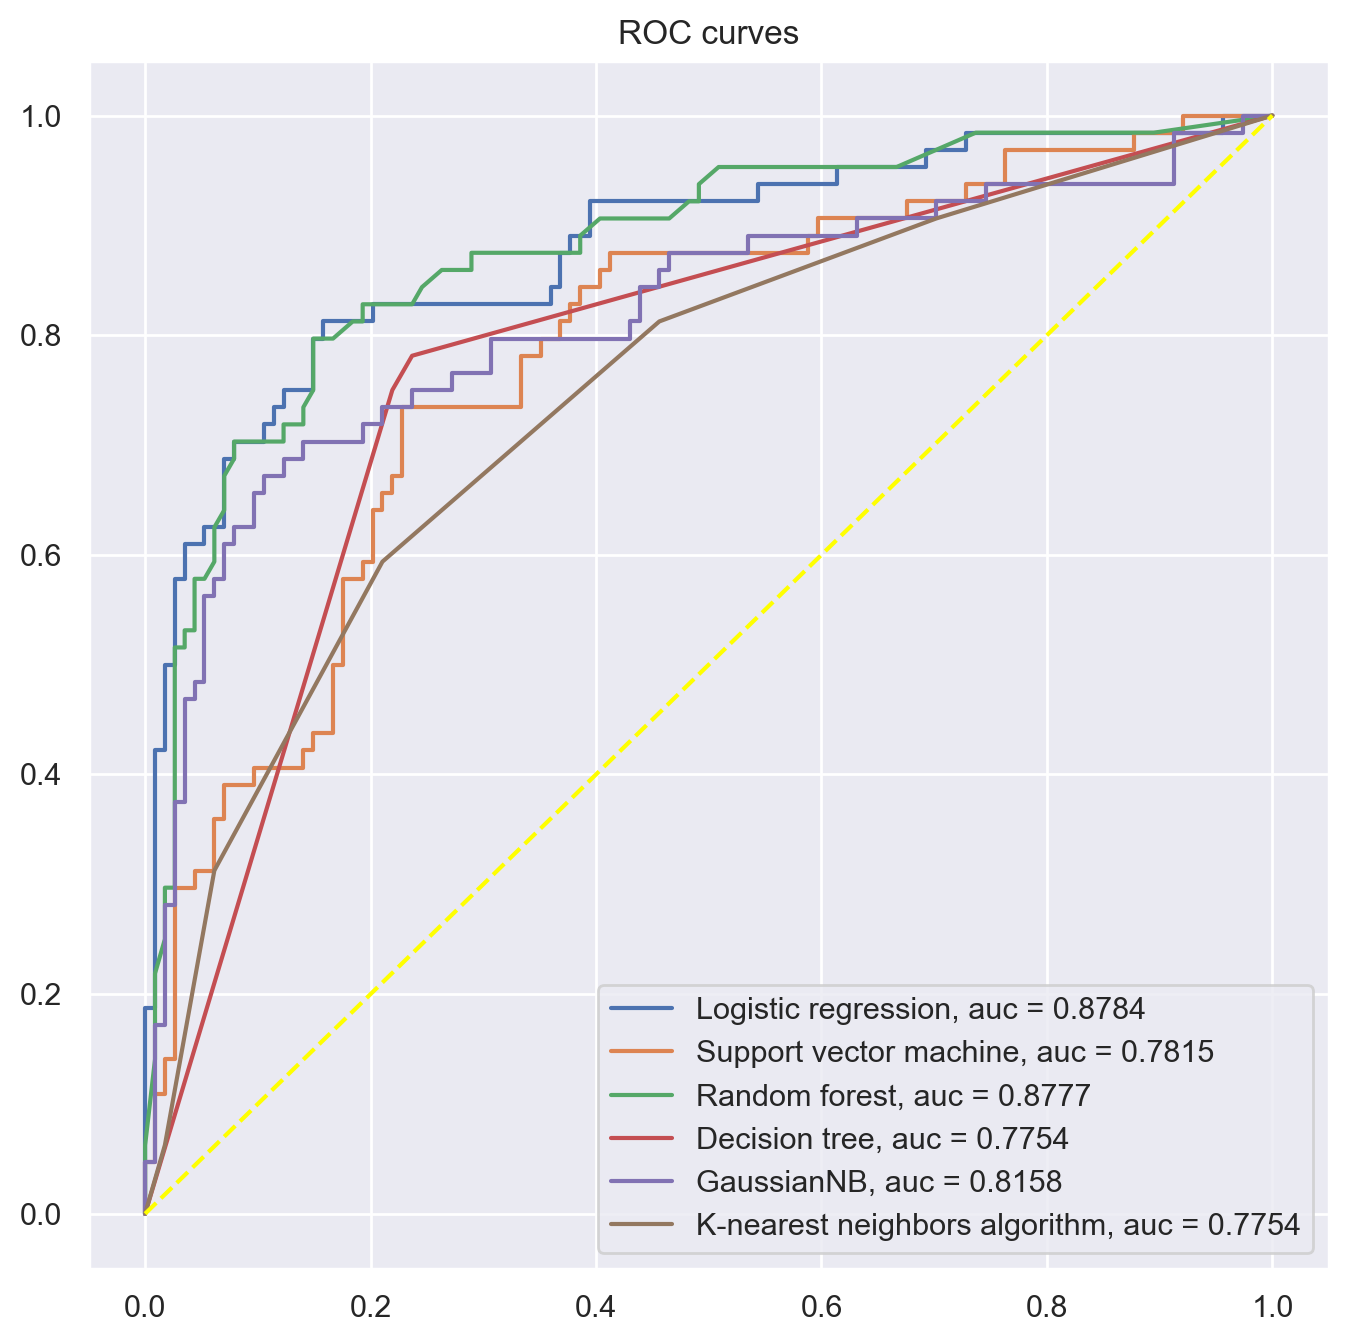

In [162]:
#Plot ROC curve for implemented models
from sklearn.metrics import roc_curve, auc

log_fpr, log_tpr, thershold = roc_curve(y_test, lgr.predict_proba(x_test)[::, 1])
auc_log = auc (log_fpr, log_tpr)
swm_fpr, swm_tpr, thershold = roc_curve(y_test, model_svm.predict_proba(x_test)[::, 1])
auc_swm = auc (swm_fpr, swm_tpr)
rf_fpr, rf_tpr, thershold = roc_curve(y_test, model_random_forest.predict_proba(x_test)[::, 1])
auc_rf = auc (rf_fpr, rf_tpr)
dt_fpr, dt_tpr, thershold = roc_curve(y_test, model_decision_tree.predict_proba(x_test)[::, 1])
auc_dt = auc (dt_fpr, dt_tpr)
nb_fpr, nb_tpr, thershold = roc_curve(y_test,model_nb.predict_proba(x_test)[::, 1])
auc_nb = auc (nb_fpr, nb_tpr)
knn_fpr, knn_tpr, thershold = roc_curve(y_test, model_knn.predict_proba(x_test)[::, 1])
auc_knn = auc (dt_fpr, dt_tpr)

plt.figure (figsize = (8, 8), dpi = 200)
plt.plot (log_fpr, log_tpr, label = "Logistic regression, auc = %0.4f"%(auc_log))
plt.plot (swm_fpr, swm_tpr, label = "Support vector machine, auc = %0.4f"%(auc_swm))
plt.plot (rf_fpr, rf_tpr, label = "Random forest, auc = %0.4f"%(auc_rf))
plt.plot (dt_fpr, dt_tpr, label = "Decision tree, auc = %0.4f"%(auc_dt))
plt.plot (nb_fpr, nb_tpr, label = "GaussianNB, auc = %0.4f"%(auc_nb))
plt.plot (knn_fpr, knn_tpr, label = "K-nearest neighbors algorithm, auc = %0.4f"%(auc_knn))
plt.plot([0,1], [0,1], color='yellow', linestyle='--')

plt.title("ROC curves")
plt.legend()
plt.show()
